In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, r2_score
from sklearn.decomposition import PCA

import requests
from bs4 import BeautifulSoup

import pickle
import time

In [2]:
testinc = pd.read_csv('../data/testinc.csv')

In [3]:
testinc.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)

### Modeling

### K Means Clustering

In [68]:
pd.set_option('display.max_columns', 35)
testinc.head()

,townstate,poverty,med_income,hs_completion,n_households,population,density,crime_rate,property_crime,violent_crime,students_per_teacher,gini,lat,lng,unemployment_rate,home_price,crime_rate_pc,vcrime_rate_pc,pcrime_rate_pc,people_per_household,state,preds,residuals
0,"Abbeville, Alabama",20.7,40186.0,79.1,2555,6055,12.2,62.0,51.0,11.0,13.000000,0.46135,31.60296,-85.21630,4.58761,86264.0,0.010239,0.001817,0.008423,2.369863,Alabama,103324.371940,17060.371940
1,"Abbeville, Louisiana",31.5,47483.0,70.7,9292,25897,42.4,591.0,474.0,117.0,14.875000,0.46135,29.89813,-92.19967,4.58761,129370.0,0.022821,0.004518,0.018303,2.787021,Louisiana,131509.736001,2139.736001
2,"Abbeville, South Carolina",39.9,34292.0,75.3,4925,13006,19.9,229.0,199.0,30.0,14.600000,0.46135,34.17875,-82.42871,4.58761,128638.0,0.017607,0.002307,0.015301,2.640812,South Carolina,90369.607758,-38268.392242
3,"Aberdeen, Idaho",13.8,43793.0,61.3,1127,3533,5.0,22.0,21.0,1.0,20.000000,0.46135,43.01939,-112.86185,4.58761,128794.0,0.006227,0.000283,0.005944,3.134871,Idaho,157153.255114,28359.255114
4,"Aberdeen, Maryland",17.2,60489.0,88.0,9538,24453,277.6,330.0,251.0,79.0,12.285714,0.41070,39.51075,-76.20061,3.70000,213991.0,0.013495,0.003231,0.010265,2.563745,Maryland,195695.860614,-18295.139386


In [69]:
testinc['log_density'] = np.log(testinc['density'])

In [78]:
features = [
    'med_income',
    'poverty',
    'hs_completion',
    'population',
    'density',
    'lat',
    'lng',
    #'log_density',
    'students_per_teacher',
    'gini',
    'crime_rate',
    'crime_rate_pc',
    'property_crime',
    'violent_crime',
    'unemployment_rate',
    'home_price'
]
X = testinc[features].copy()

In [79]:
X.corr()

,med_income,poverty,hs_completion,population,density,lat,lng,students_per_teacher,gini,crime_rate,crime_rate_pc,property_crime,violent_crime,unemployment_rate,home_price
med_income,1.000000,-0.667322,0.521329,0.327548,0.226592,0.203964,-0.192430,0.105823,-0.122268,0.135994,-0.094674,0.154220,-0.007289,-0.217877,0.715272
poverty,-0.667322,1.000000,-0.596651,-0.140142,-0.140821,-0.282669,0.158545,-0.056780,0.147579,-0.026673,0.080495,-0.045737,0.093062,0.201973,-0.357620
hs_completion,0.521329,-0.596651,1.000000,0.152299,0.066058,0.376098,-0.021677,0.048625,-0.092610,0.072495,-0.022981,0.093543,-0.070927,-0.204912,0.295034
population,0.327548,-0.140142,0.152299,1.000000,0.287677,-0.062187,0.080163,0.111295,-0.062801,0.655655,0.039584,0.653115,0.499741,-0.061357,0.234210
density,0.226592,-0.140821,0.066058,0.287677,1.000000,0.026315,0.036621,0.071847,0.135645,0.301118,0.123181,0.290070,0.287974,-0.000372,0.284547
lat,0.203964,-0.282669,0.376098,-0.062187,0.026315,1.000000,-0.246062,0.070439,-0.130495,-0.056842,-0.062261,-0.050012,-0.082430,-0.129338,0.097298
lng,-0.192430,0.158545,-0.021677,0.080163,0.036621,-0.246062,1.000000,-0.166736,0.057097,0.001072,-0.074052,-0.005918,0.042143,-0.061305,-0.341005
students_per_teacher,0.105823,-0.056780,0.048625,0.111295,0.071847,0.070439,-0.166736,1.000000,-0.030480,0.120092,0.052545,0.122078,0.077034,0.039557,0.149454
gini,-0.122268,0.147579,-0.092610,-0.062801,0.135645,-0.130495,0.057097,-0.030480,1.000000,-0.011981,0.028268,-0.023485,0.059198,0.265483,0.014598
crime_rate,0.135994,-0.026673,0.072495,0.655655,0.301118,-0.056842,0.001072,0.120092,-0.011981,1.000000,0.531496,0.994242,0.773357,0.022658,0.175484


In [80]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [81]:
km = KMeans(n_clusters = 2, random_state = 42)

In [82]:
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [83]:
testinc['cluster'] = km.labels_

In [92]:
centroids = testinc.groupby('cluster')[features].mean()
centroids.T

cluster,0,1
med_income,50131.416991,61773.124949
poverty,18.930562,16.456916
hs_completion,84.440810,87.289388
population,8913.701921,35149.411765
density,76.738927,538.410105
lat,37.991461,37.620970
lng,-92.408172,-94.007546
students_per_teacher,15.088422,17.504096
gini,0.457146,0.456076
crime_rate,94.644055,613.724960


In [85]:
ss.inverse_transform(km.cluster_centers_)

array([[ 5.01314170e+04,  1.89305616e+01,  8.44408096e+01,
         8.91370192e+03,  7.67389274e+01,  3.79914607e+01,
        -9.24081720e+01,  1.50884221e+01,  4.57145944e-01,
         9.46440554e+01,  1.07618113e-02,  8.44536834e+01,
         1.01903720e+01,  4.55233400e+00,  1.51580640e+05],
       [ 6.17731249e+04,  1.64569157e+01,  8.72893879e+01,
         3.51494118e+04,  5.38410105e+02,  3.76209702e+01,
        -9.40075461e+01,  1.75040964e+01,  4.56075846e-01,
         6.13724960e+02,  2.36531266e-02,  5.45242448e+02,
         6.84825119e+01,  4.55132239e+00,  2.87721328e+05]])

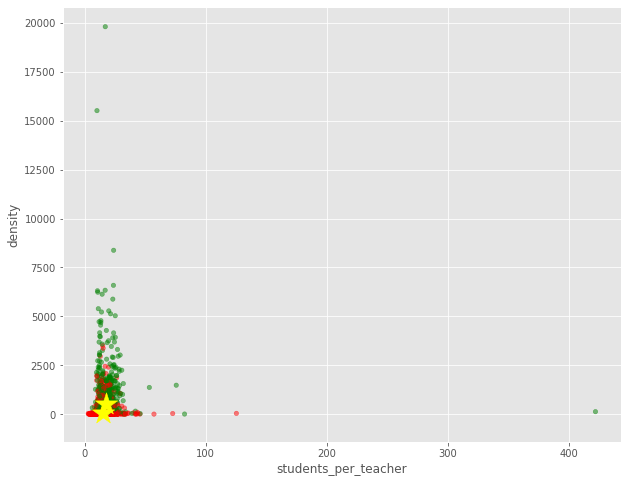

In [90]:
colors = ['red', 'green']
testinc['color'] = testinc['cluster'].map(lambda p: colors[p])

axis_1 = 'students_per_teacher'
axis_2 = 'density'

ax = testinc.plot(    
    kind = 'scatter', 
    x = axis_1, y = axis_2,
    figsize = (10,8),
    alpha = .5,
    c = testinc['color']
)

centroids.plot(
    kind = 'scatter', 
    x = axis_1, y = axis_2, 
    marker = '*', c = 'yellow', s = 550,
    ax = ax
);

In [88]:
silhouette_score(X_scaled, km.labels_)

0.32541856959720616

In [127]:
scores = []
for k in range(2, 30):
    cl = KMeans(n_clusters = k, random_state = 42)
    cl.fit(X_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_scaled, cl.labels_)
    scores.append((k, inertia, sil))

In [128]:
score_df = pd.DataFrame(scores, columns = ['k', 'inertia', 'sil'])
score_df.head()

,k,inertia,sil
0,2,55414.006188,0.363376
1,3,49229.350610,0.184653
2,4,44994.607122,0.171310
3,5,41800.322747,0.172641
4,6,39859.293797,0.171408


### Regression

In [4]:
pd.set_option('display.max_columns', 35)
testinc.head()

,townstate,poverty,med_income,hs_completion,n_households,population,density,crime_rate,property_crime,violent_crime,students_per_teacher,gini,lat,lng,unemployment_rate,home_price,crime_rate_pc,vcrime_rate_pc,pcrime_rate_pc,people_per_household,state,preds,residuals
0,"Abbeville, Alabama",20.7,40186.0,79.1,2555,6055,12.2,62.0,51.0,11.0,13.000000,0.46135,31.60296,-85.21630,4.58761,86264.0,0.010239,0.001817,0.008423,2.369863,Alabama,103106.017089,16842.017089
1,"Abbeville, Louisiana",31.5,47483.0,70.7,9292,25897,42.4,591.0,474.0,117.0,14.875000,0.46135,29.89813,-92.19967,4.58761,129370.0,0.022821,0.004518,0.018303,2.787021,Louisiana,132736.201408,3366.201408
2,"Abbeville, South Carolina",39.9,34292.0,75.3,4925,13006,19.9,229.0,199.0,30.0,14.600000,0.46135,34.17875,-82.42871,4.58761,128638.0,0.017607,0.002307,0.015301,2.640812,South Carolina,92940.060425,-35697.939575
3,"Aberdeen, Idaho",13.8,43793.0,61.3,1127,3533,5.0,22.0,21.0,1.0,20.000000,0.46135,43.01939,-112.86185,4.58761,128794.0,0.006227,0.000283,0.005944,3.134871,Idaho,158927.403319,30133.403319
4,"Aberdeen, Maryland",17.2,60489.0,88.0,9538,24453,277.6,330.0,251.0,79.0,12.285714,0.41070,39.51075,-76.20061,3.70000,213991.0,0.013495,0.003231,0.010265,2.563745,Maryland,204127.397598,-9863.602402


In [5]:
testinc.shape

(5371, 23)

In [6]:
features = [
    'med_income',
    'poverty',
    'hs_completion',
    'density',
    'population',
    'students_per_teacher',
    'people_per_household',
    'lat',
    'lng',
    'crime_rate',
    'crime_rate_pc',
    'unemployment_rate',
    'gini',
]
X = testinc[features]
y = np.log(testinc['home_price'])

In [7]:
# pf = PolynomialFeatures()
# X_poly = pf.fit_transform(X)
X_poly = X.copy()

In [8]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_poly)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42)

In [57]:
rf = RandomForestRegressor(max_depth = 8, n_estimators = 25, random_state = 6)
rf.fit(X_train, y_train)
#rf.score(X_test, y_test)
pred = np.exp(rf.predict(X_test))
r2_score(np.exp(y_test), pred)

0.8574114122892804

In [12]:
testinc['preds'] = np.exp(rf.predict(X_scaled))

In [13]:
testinc['residuals'] = testinc['preds'] - testinc['home_price']

In [93]:
testinc.head()

,townstate,poverty,med_income,hs_completion,n_households,population,density,crime_rate,property_crime,violent_crime,students_per_teacher,gini,lat,lng,unemployment_rate,home_price,crime_rate_pc,vcrime_rate_pc,pcrime_rate_pc,people_per_household,state,preds,residuals,log_density,cluster,color
0,"Abbeville, Alabama",20.7,40186.0,79.1,2555,6055,12.2,62.0,51.0,11.0,13.000000,0.46135,31.60296,-85.21630,4.58761,86264.0,0.010239,0.001817,0.008423,2.369863,Alabama,103324.371940,17060.371940,2.501436,0,red
1,"Abbeville, Louisiana",31.5,47483.0,70.7,9292,25897,42.4,591.0,474.0,117.0,14.875000,0.46135,29.89813,-92.19967,4.58761,129370.0,0.022821,0.004518,0.018303,2.787021,Louisiana,131509.736001,2139.736001,3.747148,1,green
2,"Abbeville, South Carolina",39.9,34292.0,75.3,4925,13006,19.9,229.0,199.0,30.0,14.600000,0.46135,34.17875,-82.42871,4.58761,128638.0,0.017607,0.002307,0.015301,2.640812,South Carolina,90369.607758,-38268.392242,2.990720,0,red
3,"Aberdeen, Idaho",13.8,43793.0,61.3,1127,3533,5.0,22.0,21.0,1.0,20.000000,0.46135,43.01939,-112.86185,4.58761,128794.0,0.006227,0.000283,0.005944,3.134871,Idaho,157153.255114,28359.255114,1.609438,0,red
4,"Aberdeen, Maryland",17.2,60489.0,88.0,9538,24453,277.6,330.0,251.0,79.0,12.285714,0.41070,39.51075,-76.20061,3.70000,213991.0,0.013495,0.003231,0.010265,2.563745,Maryland,195695.860614,-18295.139386,5.626181,1,green


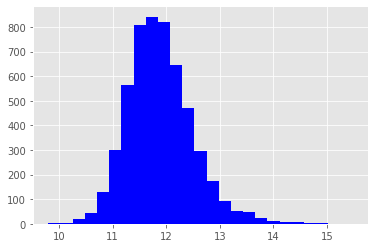

In [99]:
plt.hist(
    y, 
    bins = 25,
    color = 'blue'
);

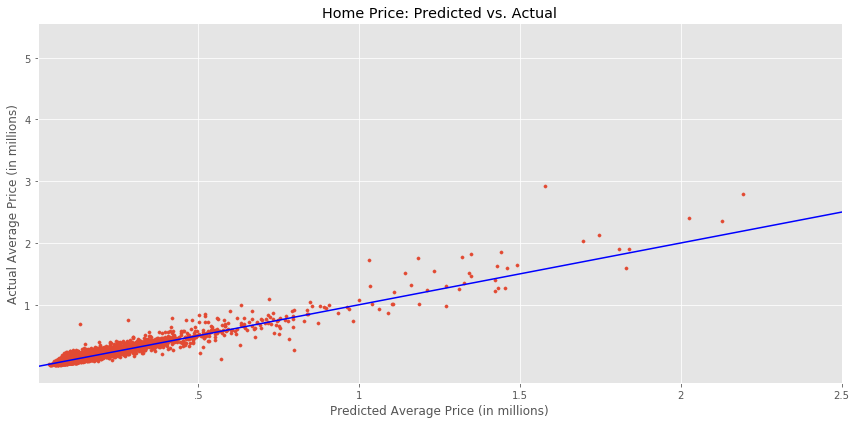

In [65]:
plt.style.use('ggplot')
plt.figure(figsize = (12,6))

plt.scatter(
    x = testinc['preds'],
    y = testinc['home_price'],
    s = 10,
    alpha = 1
)

plt.xlabel('Predicted Average Price (in millions)')
plt.ylabel('Actual Average Price (in millions)')

plt.xlim(0, 2_500_000)

plt.plot(
    np.linspace(0,2.5e6), 
    np.linspace(0,2.5e6), 
    c = 'blue',
    alpha = 1
)

plt.xticks(
    ticks = [500_000, 1_000_000, 1_500_000, 2_000_000, 2_500_000], #, 3_000_000, 3_500_000],
    labels = ['.5', '1', '1.5', '2', '2.5'] #, '3m', '3.5m']
)
plt.yticks(
    ticks = [1_000_000, 2_000_000, 3_000_000, 4_000_000, 5_000_000],
    labels = ['1', '2', '3', '4', '5']
)

plt.title('Home Price: Predicted vs. Actual')
plt.tight_layout()
plt.savefig('../plots/rf.png');

In [74]:
testinc.to_csv('../data/testinc.csv')

In [10]:
# pickle model
pickle.dump(rf, open("cap.pkl", "wb"))

In [39]:
### Feature importance ###
# Residuals, missing data
# Feature relationships (student ratio is proxy for density?), education proxy for income?
# Joining data sources
# Ratio of crime types
# Under budget police towns have big erros
# Can model fill in blanks for places with non reported crimes?

# Random forest vs. linear regression

In [35]:
pd.Series(rf.feature_importances_, features).sort_values()

unemployment_rate       0.003355
crime_rate              0.003679
students_per_teacher    0.004392
gini                    0.005620
poverty                 0.006416
people_per_household    0.008927
crime_rate_pc           0.008944
hs_completion           0.011059
lat                     0.031189
population              0.040604
density                 0.044394
lng                     0.224846
med_income              0.606575
dtype: float64

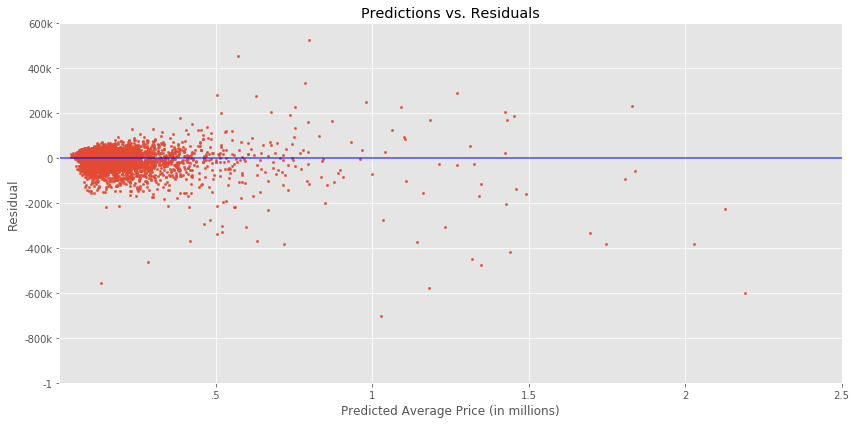

In [66]:
plt.figure(figsize = (12,6))

plt.scatter(
    x = testinc['preds'], 
    y = testinc['residuals'], 
    s = 5)

plt.xlim(0, 2_500_000)
plt.ylim(-1_000_000, 600_000)

plt.xlabel('Predicted Average Price (in millions)')
plt.ylabel('Residual')

plt.plot(
    np.linspace(0,2.5e6), 
    np.linspace(0, 0), 
    c = 'blue',
    alpha = .7
)

plt.xticks(
    ticks = [500_000, 1_000_000, 1_500_000, 2_000_000, 2_500_000], #, 3_000_000, 3_500_000],
    labels = ['.5', '1', '1.5', '2', '2.5'] #, '3m', '3.5m']
)
plt.yticks(
    ticks = [-1_000_000, -800_000, -600_000, -400_000, -200_000, 0, 200_000, 400_000, 600_000],
    labels = ['-1', '-800k', '-600k', '-400k', '-200k', '0', '200k', '400k', '600k']
)

plt.title('Predictions vs. Residuals')
plt.tight_layout()
plt.savefig('../plots/resid.png');

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#lr.score(X_train, y_train), lr.score(X_test, y_test)
pred = np.exp(lr.predict(X_test))
r2_score(np.exp(y_test), pred)

-0.23372337808457067

In [59]:
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.6355758611905622

In [60]:
rflr = pd.DataFrame(np.exp(lr.predict(X_test)), columns = ['lin_reg'])
rflr['ran_for'] = np.exp(rf.predict(X_test))
rflr['diff'] = rflr['lin_reg'] - rflr['ran_for']
rflr.head()

,lin_reg,ran_for,diff
0,106339.369609,97645.164853,8694.204756
1,113457.069146,114516.366533,-1059.297387
2,98166.717680,83162.298281,15004.419398
3,120272.218257,109127.132875,11145.085383
4,113316.787477,118988.566369,-5671.778892


In [56]:
rflr.sort_values(by = 'diff')

,lin_reg,ran_for,diff
818,6.181118e+05,1.276016e+06,-6.579040e+05
107,5.836839e+05,1.140244e+06,-5.565598e+05
308,2.375255e+05,7.649410e+05,-5.274156e+05
1011,7.353120e+05,1.222171e+06,-4.868588e+05
291,2.735443e+05,7.424220e+05,-4.688777e+05
...,...,...,...
451,1.503506e+06,4.740830e+05,1.029423e+06
444,1.530718e+06,4.422660e+05,1.088452e+06
762,2.945374e+06,1.489374e+06,1.456000e+06
20,3.501962e+06,4.604119e+05,3.041550e+06


In [62]:
cross_val_score(lr, X, y, cv = 5).mean()

0.6329399559217623

In [63]:
lr.coef_

array([ 0.36920365, -0.00608566,  0.04209934,  0.09325613,  0.0302751 ,
        0.0274148 , -0.03668776, -0.01504098, -0.15433573,  0.06128393,
       -0.0297573 , -0.01025537, -0.01853843])